In [8]:
import joblib
from skimage import io, color, transform
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Extracting features

In [9]:
dataset_path = 'eye_diseases'

# List all subdirectories (assuming each subdirectory corresponds to a class)
class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
features_list = []


# for class_folder in class_folders:
#     print("Processing class...", class_folder, "\n\n\n\n\n")
#     class_name = os.path.basename(class_folder)
#     # Loop through each image in the class folder
#     for image_filename in os.listdir(class_folder):
#         image_path = os.path.join(class_folder, image_filename)
#
#         # Cataract, Glaucoma are of 256x256
#         # Diabetic_retinopathy, Normal are of 512x512
#
#         # Load the image
#         image = io.imread(image_path)
#         image = transform.resize(image, (256, 256, 3))
#         gray_image = color.rgb2gray(image)
#
#         # Extract gray features and visualize
#         image_arr = gray_image.flatten()
#         image_arr = image_arr / 255.0
#         features_list.append(image_arr)
#         print("appending features into the list...")

# Convert lists to NumPy arrays
# print(features_list)
# features_array = np.array(features_list)
# np.save("features_gray.npy", features_array)
features_array = np.load("features_gray.npy")
print('shape: ', features_array.shape)
# print('before: ', features_array.shape)
# for i in range(len(features_array)):
#     np.random.shuffle(features_array[i])
# np.save("features_gray.npy", features_array)
# print('after: ', features_array.shape)



shape:  (4217, 65536)


## Plotting the image

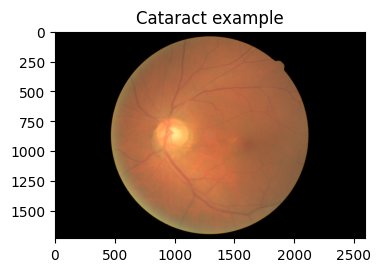

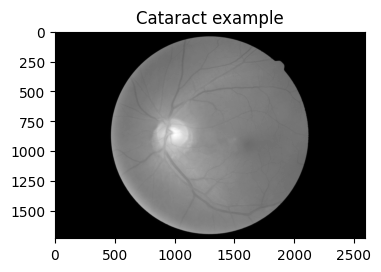

In [10]:
selected_image = io.imread("eye_diseases\cataract\cataract_001.png")

# Display the image using matplotlib
plt.figure(figsize=(4, 4))
plt.imshow(selected_image)
plt.title('Cataract example')
plt.show()

selected_image = color.rgb2gray(io.imread("eye_diseases\cataract\cataract_001.png"))
plt.figure(figsize=(4, 4))
plt.imshow(selected_image, cmap='gray')
plt.title('Cataract example')
plt.show()

## Training Kmeans Model

In [13]:
# Apply k-means clustering
n_clusters = 4  # Number of clusters (0 through 9 digits)
kmeans = KMeans(n_clusters=n_clusters, verbose=1, random_state=42)
print(features_array.shape)
print('fitting features...')
kmeans.fit(features_array)
print('features fitted.')
joblib.dump(kmeans, 'kmeans_fitted_gray.pkl')
#kmeans = joblib.load('kmeans_fitted_gray.pkl')
print(f'inertia: {kmeans.inertia_}')

(4217, 65536)
fitting features...


c:\Users\ALY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 291.2103676058192.
Iteration 1, inertia 163.75645749702207.
Iteration 2, inertia 162.86968538764938.
Iteration 3, inertia 162.7509130656583.
Iteration 4, inertia 162.72672716626.
Iteration 5, inertia 162.72100926148622.
Iteration 6, inertia 162.71996733084382.
Iteration 7, inertia 162.7194555175941.
Iteration 8, inertia 162.71883651664575.
Iteration 9, inertia 162.71781599361213.
Iteration 10, inertia 162.71722630499255.
Iteration 11, inertia 162.71659816968162.
Iteration 12, inertia 162.71622710338644.
Iteration 13, inertia 162.71589997576174.
Iteration 14, inertia 162.715490955086.
Iteration 15, inertia 162.71527727097913.
Iteration 16, inertia 162.71523951461842.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 289.4023744478811.
Iteration 1, inertia 165.8985488433674.
Iteration 2, inertia 163.40802608796915.
Iteration 3, inertia 162.33446164955342.
Iteration 4, inertia 161.50624365861216.
Iterat

## Visualize the clusters centroids

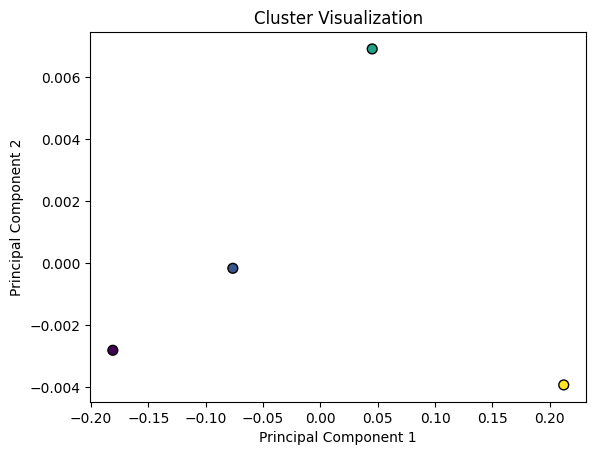

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(kmeans.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[i for i in X_pca[:, 0]], cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Visualize features in 2D

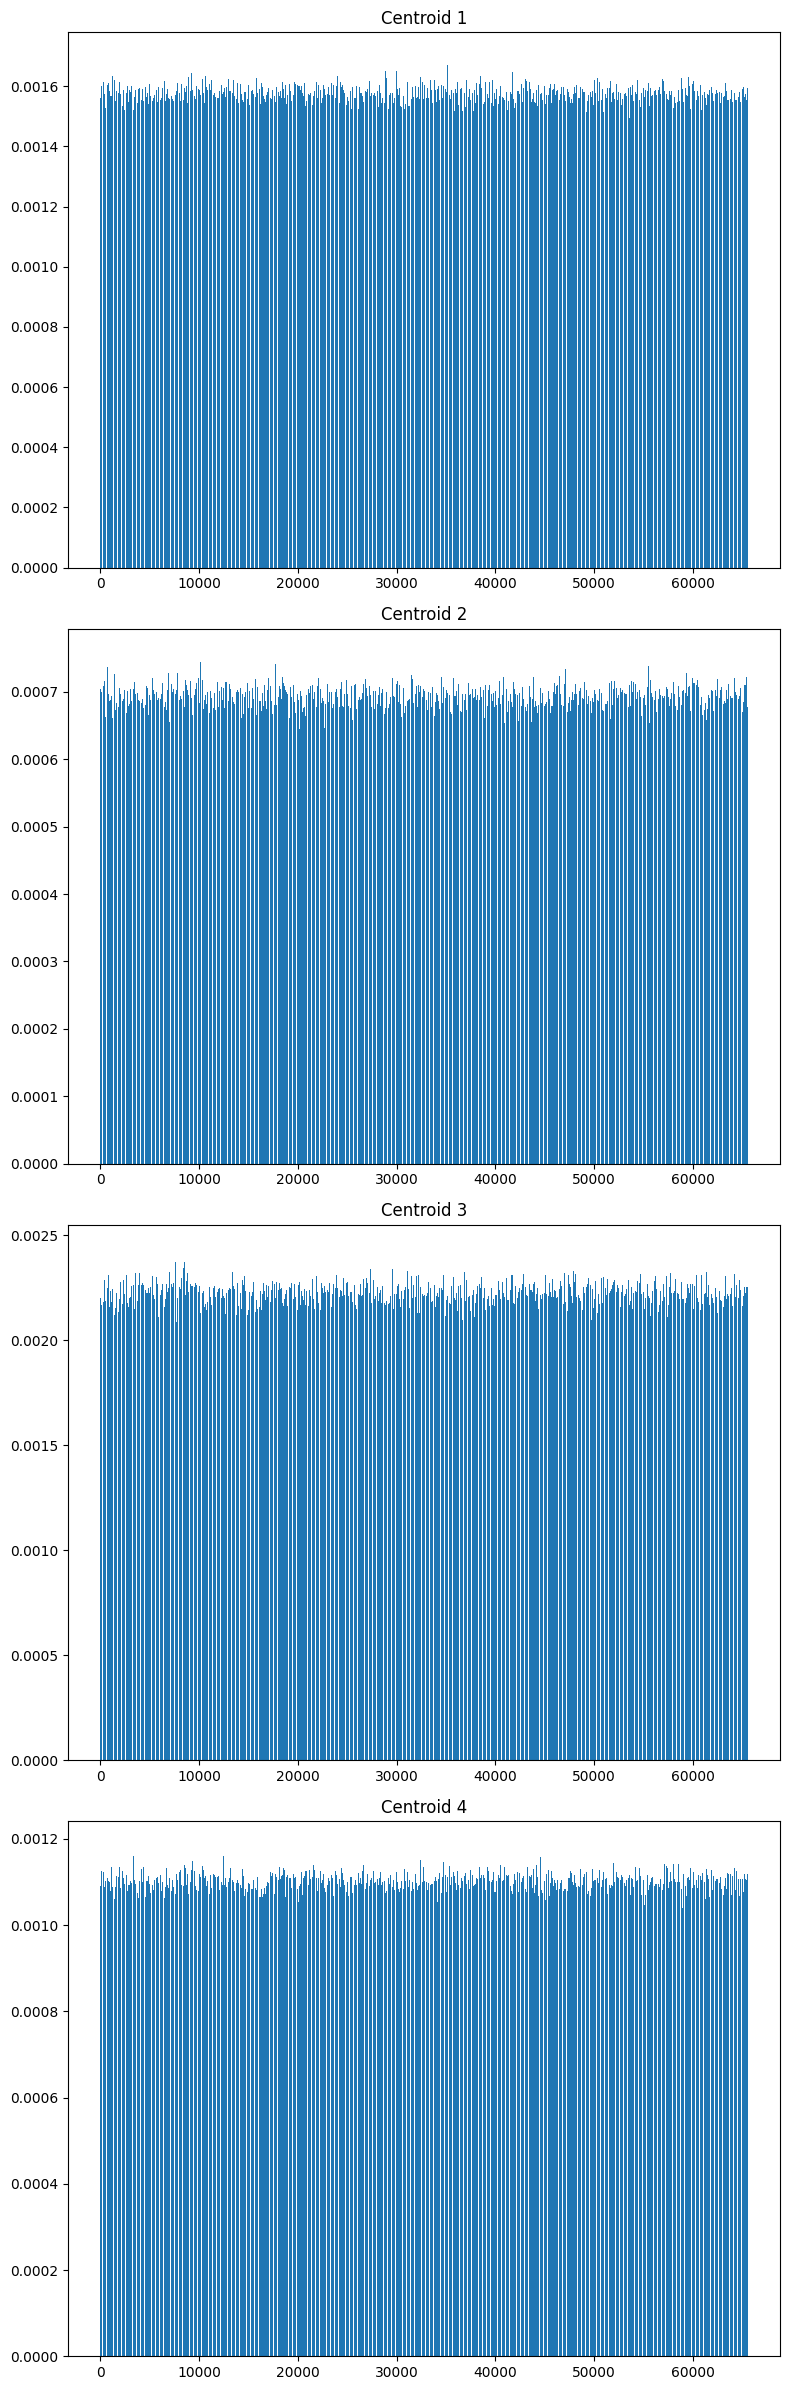

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the centroids as features
centroids = kmeans.cluster_centers_

# Assuming you have feature names for each centroid feature
feature_names = [i for i in range(65536)]  # Replace ... with actual feature names

num_clusters = len(centroids)
num_features = len(centroids[0])

# Plotting centroids as bar charts
fig, axs = plt.subplots(num_clusters, figsize=(8, 24))

for i in range(num_clusters):
    axs[i].bar(feature_names, centroids[i])
    axs[i].set_title(f'Centroid {i+1}')

plt.tight_layout()
plt.show()
